In [1]:
%reset 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from matplotlib import cm
import pylab
from scipy.optimize import fsolve

DataPath_1='./Data/Data_F7_Stoch_NeurLossm_D0p3'
DataPath_2='./Data/Data_F7_Stoch_NeurLossm_D1p0'
DataPath_rate='./Data/Data_F7_Rate_NeurLossm_Dvar'

%run ./DataGenerationScripts/load_default_parameters.ipynb # loading model parameters
%run ./DataGenerationScripts/set_size.ipynb # loading function for pdf output sizer
%run ./DataGenerationScripts/aux_state_space.ipynb # loading auxiliarry functions for state space vizualization
%run ./DataGenerationScripts/load_animal_model_data.ipynb # loading function for pdf output sizer
%run ./DataGenerationScripts/dIBDRdt_functions.ipynb # loading function for Seizure Rate calculation

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
##### This cell checks whether data exists. If not, it is being generated #####
if not os.path.isdir(DataPath_1):
    os.makedirs(DataPath_1)
if not os.path.isdir(DataPath_2):
    os.makedirs(DataPath_2)
if not os.path.isdir(DataPath_rate):
    os.makedirs(DataPath_rate)
if not os.path.isfile(DataPath_1+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/DataGeneration_F7_Stoch_NeurLossm_2D.ipynb
if not os.path.isfile(DataPath_2+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/DataGeneration_F7_Stoch_NeurLossm_2D.ipynb
if not os.path.isfile(DataPath_rate+'/Sim_1.npy'):
    print('Data not found. Running Data Generation script')
    RunningFromFigureScript=True
    %run ./DataGenerationScripts/DataGeneration_F7_Rate_NeurLossm_Dvar.ipynb

In [3]:
font = {'size'   : 8}
# plt.rc('font', family='sans-serif') 
# plt.rc('font', serif='Helvetica Neue')
plt.rc('font',**{'family':'sans-serif','serif':['Helvetica Neue']})
plt.rc('font', **font)
plt.rc('text', usetex=True)

viridis = cm.get_cmap('viridis', 12)
color_scheme_3examples = [viridis(0.05)[0:3],viridis(0.5)[0:3],viridis(0.9)[0:3]]
alpha_value=0.45
size_scaler = 2.5
marker_sizer=2.5
alp=0.1 # alpha value for transparent lines N=30

h=2.8*0.393701 #[cm] to  modification [inch] Height of output figure
w=2.8*0.393701 #[cm] to  modification [inch] Width of output figure
margin=0.4 # [1] margin ratio of output figure layout
size_scaler=2.5

## Figure 7a  

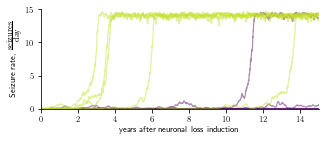

In [4]:
N=5

fig1 = plt.figure(figsize=[2*w,1.25*w])
ax = fig1.add_subplot(1, 1, 1) 

# print ('D=0.3')
for ii in range(0,N):
    listt=np.load(DataPath_1+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    params_dict=listt[0]
    dt=listt[0]['dt']
    t_vec = listt[1]['t_vec']/365
    lambda_vec = listt[1]['lambda_vec']

    plt.plot(t_vec,lambda_vec,color=color_scheme_3examples[0],alpha=alpha_value,label='P$_s$(t)',linewidth=3/size_scaler)
#     print(lambda_vec[-1])

# print ('D=1')
for ii in range(0,N):
    listt=np.load(DataPath_2+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    params_dict=listt[0]
    dt=listt[0]['dt']
    t_vec = listt[1]['t_vec']/365
    lambda_vec = listt[1]['lambda_vec']

    plt.plot(t_vec,lambda_vec,color=color_scheme_3examples[2],alpha=alpha_value,label='P$_s$(t)',linewidth=3/size_scaler)
#     print(lambda_vec[-1])
    
plt.xlabel('years after neuronal loss induction')
plt.ylabel(r'Seizure rate, $\frac{\textnormal{seizures}}{\textnormal{day}}$')
    
plt.xlim(0,15)
plt.ylim(0,params_dict['lambda_max'])
plt.yticks([0,5,10,15])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
    
plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
set_size(3.5*w,1.25*w)
fig1.savefig('Figures/Fig7/Fig_7a1.pdf')

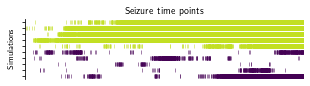

In [4]:
N=5
yinc=0.11

fig1 = plt.figure(figsize=[2*w,1.25*w])
ax = fig1.add_subplot(1, 1, 1)    

ytick_vec=np.array([])
ax.set_ybound(0,1)
ymin, ymax = plt.ylim()  # return the current ylim

for ii in range(0,N):
    
    listt=np.load(DataPath_1+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)  
    params_dict=listt[0]
    t_vec = listt[1]['t_vec']/365
    S_vec = listt[1]['S_vec']
    dt=listt[0]['dt']
    
    plt.plot(t_vec[S_vec!=0],(ymax+yinc*ii)*np.ones(len(t_vec[S_vec!=0])),marker='|',color=color_scheme_3examples[0],alpha=0.5, markersize=10/size_scaler, label='Seizure',linewidth=0)
    ytick_vec=np.append(ytick_vec,ymax+yinc*ii)

for ii in range(0,N):
    
    listt=np.load(DataPath_2+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)  
    params_dict=listt[0]
    t_vec = listt[1]['t_vec']/365
    S_vec = listt[1]['S_vec']
    dt=listt[0]['dt']
    
    plt.plot(t_vec[S_vec!=0],(ymax+yinc*(ii+5))*np.ones(len(t_vec[S_vec!=0])),marker='|',color=color_scheme_3examples[2],alpha=0.5, markersize=10/size_scaler, label='Seizure',linewidth=0)
    ytick_vec=np.append(ytick_vec,ymax+yinc*(ii+5))
    
plt.title(r'Seizure time points')
plt.ylabel(r'Simulations')
plt.xlim(0,15)
plt.xticks([])
ymin, ymax = plt.ylim()
plt.yticks(ytick_vec,[''])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
    
plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
plt.gcf().subplots_adjust(top=1-margin/2)
set_size(3.5*w,0.75*w)
fig1.savefig('Figures/Fig7/Fig_7a2.jpeg', dpi=600)

## Figure 7b

In [5]:
D_vis_vect=[0,0.3,0.4103035,1]

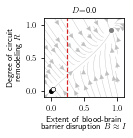

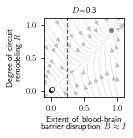

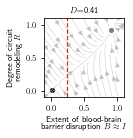

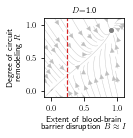

In [8]:
params=load_default_parameters('rate')
locals().update(params)

for ii in range(0,len(D_vis_vect)):
    
    D_const=D_vis_vect[ii]

    B_max = 1.1
    R_max = 1.1
    B_min = -0.1
    R_min = -0.1

    R,B = np.mgrid[R_min:R_max:5000j, B_min:B_max:5000j]

    FP=[];
    f = K_SB*(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)-1)/(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)+1)
    U = 1./tau_B*(-B+k_IB*k_BI*B+f)
    V = 1./tau_R*(-R+k_BR*B+k_DR*D_const) 

#     velocity = np.sqrt(U*U + V*V)                
    FP=fixedpointsfinder(fun_dbdt,-0.1,1,100000) # Here we will check for steady states on given interval with given discritization step

    
    pylab.ion()
    fig0= plt.figure()
    ax0 = fig0.add_subplot(1, 1, 1)
    strm = ax0.streamplot(B, R, U, V, linewidth=1/marker_sizer, color=[0.75,0.75,0.75], density=[0.5,1.5])

    for cc in range(len(FP)):
        if FP[cc][0]>=Theta:
            col='grey'
        else:
            col='black' 

        mrksize = 10
        if FP[cc][1]=='Unstable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Semistable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'x',color=col, markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Stable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)

    threshold_position = Theta/k_BI
    plt.plot([threshold_position, threshold_position],[R_min,R_max],'--',color='tab:red',linewidth = 3.0/marker_sizer)


    plt.xlabel("Extent of blood-brain \n" 
               r"barrier disruption $B \approx I$")
    plt.ylabel("Degree of circuit \n"
               r"remodeling $R$")
    plt.title('$D$='+str(np.round(D_const*100)/100),fontsize=font['size'])

    ax0.set_xlim([B_min,B_max])
    ax0.set_ylim([R_min,R_max])

    plt.gcf().subplots_adjust(bottom=margin)
    plt.gcf().subplots_adjust(left=margin)
    set_size(1.0*w,1.0*w)
    fig0.savefig('Figures/Fig7/Fig_7b'+str(ii+1)+'.pdf')  

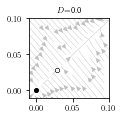

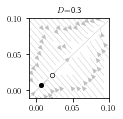

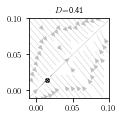

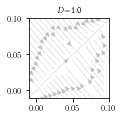

In [7]:
params=load_default_parameters('rate')
locals().update(params)

for ii in range(0,len(D_vis_vect)):
    D_const=D_vis_vect[ii]

    B_max = 0.1
    R_max = 0.1
    B_min = -0.01
    R_min = -0.01

    R,B = np.mgrid[R_min:R_max:5000j, B_min:B_max:5000j]

    FP=[];
    f = K_SB*(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)-1)/(np.exp(k_IS*np.square(k_BI*B)+k_RS*R)+1)
    U = 1./tau_B*(-B+k_IB*k_BI*B+f)
    V = 1./tau_R*(-R+k_BR*B+k_DR*D_const) 

#     velocity = np.sqrt(U*U + V*V)                
    FP=fixedpointsfinder(fun_dbdt,-0.1,1,100000) # Here we will check for steady states on given interval with given discritization step

    
    pylab.ion()
    fig0= plt.figure()
    ax0 = fig0.add_subplot(1, 1, 1)
    strm = ax0.streamplot(B, R, U, V, linewidth=1/marker_sizer, color=[0.75,0.75,0.75], density=[0.5,1.5])

    for cc in range(len(FP)):
        if FP[cc][0]>=Theta:
            col='grey'
        else:
            col='black' 

        mrksize = 10
        if FP[cc][1]=='Unstable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Semistable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'o',color='white', markersize=mrksize/marker_sizer-3/marker_sizer)
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const,'x',color=col, markersize=mrksize/marker_sizer-3/marker_sizer)
        if FP[cc][1]=='Stable':
            plt.plot(FP[cc][0],FP[cc][0]+k_DR*D_const, 'o',color=col, markersize=mrksize/marker_sizer)

    threshold_position = Theta/k_BI
    plt.plot([threshold_position, threshold_position],[R_min,R_max],'--',color='tab:red',linewidth = 3.0/marker_sizer)


#     plt.xlabel("Extent of blood-brain \n" 
#                r"barrier disruption $B \approx I$")
#     plt.ylabel("Degree of circuit \n"
#                r"remodeling $R$")
    plt.title('$D$='+str(np.round(D_const*100)/100),fontsize=font['size'])

    ax0.set_xlim([B_min,B_max])
    ax0.set_ylim([R_min,R_max])

    plt.gcf().subplots_adjust(bottom=margin)
    plt.gcf().subplots_adjust(left=margin)
    set_size(1.0*w,1.0*w)
    fig0.savefig('Figures/Fig7/Fig_7b'+str(ii+1)+'_inset.pdf') 

## Figure 7c

In [ ]:
D0_vect=[0.45, 0.5, 0.6, 0.7, 0.8, 0.9, 1.]
t_progr=[]

for ii in range(0,len(D0_vect)):
    listt=np.load(DataPath_rate+'/Sim_'+str(ii+1)+'.npy',allow_pickle=True)
    t_vec=listt[1]['t_vec'].copy()
    I_vec=listt[1]['I_vec'].copy()
    t_progr.append(t_vec[I_vec>I_vec[-1]*0.9][0]/365)

In [ ]:
fig = matplotlib.pyplot.gcf()
ax = fig.add_subplot(1, 1, 1) 

plt.plot(D0_vect,t_progr,'.', markersize=20*1/marker_sizer,color='black')
plt.plot(D0_vect,t_progr,'k',linewidth = 3.0/marker_sizer)
plt.plot([0.41, 0.41],[0, 1e5],'k--',linewidth = 3.0/marker_sizer)

plt.ylim([0,43])
plt.yticks([0,10,20,30,40])
plt.xlim([0,1.05])
plt.ylabel('Average time until progressive\n epileptogenesis, years')
plt.xlabel(r'Extent of neuronal loss, $D$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.gcf().subplots_adjust(bottom=margin)
plt.gcf().subplots_adjust(left=margin)
set_size(1.5*w,1.5*w)

fig.savefig('Figures/Fig7/Fig_7c.pdf')